In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt


%matplotlib inline

full_result_season = pd.read_csv('./data/RegularSeasonDetailedResults.csv')

#import team IDs
team_ids = pd.read_csv('./data/Teams.csv')

In [4]:
full_result_season.columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
      dtype='object')

In [5]:
named_test = pd.merge(full_result_season, team_ids[['TeamID', 'TeamName']], left_on='WTeamID', right_on='TeamID')

In [6]:
named_test.columns = [u'Season', u'DayNum', u'WTeamID', u'WScore', u'LTeamID', u'LScore',
       u'WLoc', u'NumOT', u'WFGM', u'WFGA', u'WFGM3', u'WFGA3', u'WFTM',
       u'WFTA', u'WOR', u'WDR', u'WAst', u'WTO', u'WStl', u'WBlk', u'WPF',
       u'LFGM', u'LFGA', u'LFGM3', u'LFGA3', u'LFTM', u'LFTA', u'LOR', u'LDR',
       u'LAst', u'LTO', u'LStl', u'LBlk', u'LPF', u'TeamID', u'WTeamName']

named_test = named_test.drop('TeamID', axis=1)

In [7]:
named_test = pd.merge(named_test, team_ids[['TeamID', 'TeamName']], left_on='LTeamID', right_on='TeamID')

In [8]:
named_test.columns = [u'Season',    u'DayNum',   u'WTeamID',    u'WScore',   u'LTeamID',
          u'LScore',      u'WLoc',     u'NumOT',      u'WFGM',      u'WFGA',
           u'WFGM3',     u'WFGA3',      u'WFTM',      u'WFTA',       u'WOR',
             u'WDR',      u'WAst',       u'WTO',      u'WStl',      u'WBlk',
             u'WPF',      u'LFGM',      u'LFGA',     u'LFGM3',     u'LFGA3',
            u'LFTM',      u'LFTA',       u'LOR',       u'LDR',      u'LAst',
             u'LTO',      u'LStl',      u'LBlk',       u'LPF', u'WTeamName',
          u'TeamID',  u'LTeamName']
named_test = named_test.drop('TeamID', axis=1)

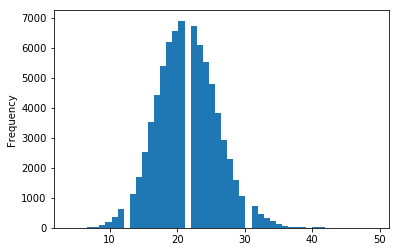

In [9]:
named_test['LDR'].plot.hist(bins = 50)

In [10]:
named_test['LDR'].median()

21.0

Aggregate averages per season

In [11]:
#Calculator Function for Stats

def point_stats(win_team_seas, loss_team_seas):

    #Points
    ppg_seas = (win_team_seas['WScore'].mean()*len_win + loss_team_seas['LScore'].mean()*len_loss)/(len_win+len_loss) 
    ppga_seas = (win_team_seas['LScore'].mean()*len_win + loss_team_seas['WScore'].mean()*len_loss)/(len_win+len_loss)

    return ppg_seas, ppga_seas
        
def rebound_stats(win_team_seas, loss_team_seas):
    # Rebounds - Defensive and Offensive
    #Defensive
    drb_seas = (win_team_seas['WDR'].mean()*len_win + loss_team_seas['LDR'].mean()*len_loss)/(len_win+len_loss)
    drba_seas = (win_team_seas['LDR'].mean()*len_win + loss_team_seas['WDR'].mean()*len_loss)/(len_win+len_loss)
    #Offensive
    orb_seas = (win_team_seas['WOR'].mean()*len_win + loss_team_seas['LOR'].mean()*len_loss)/(len_win+len_loss)
    orba_seas = (win_team_seas['LOR'].mean()*len_win + loss_team_seas['WOR'].mean()*len_loss)/(len_win+len_loss)

    return drb_seas, drba_seas, orb_seas, orba_seas
        
        
def shooting_stats(win_team_seas, loss_team_seas):
    ###Shooting Percentages
    # FG Percent
    fg_percent = (((win_team_seas['WFGM']/win_team_seas['WFGA'])*len_win).mean() 
                  + ((loss_team_seas['LFGM']/loss_team_seas['LFGA'])*len_win).mean())/(len_win+len_loss)
    # FG Percent Allowed
    fg_percent_allow = (((win_team_seas['LFGM']/win_team_seas['LFGA'])*len_win).mean() 
                  + ((loss_team_seas['WFGM']/loss_team_seas['WFGA'])*len_win).mean())/(len_win+len_loss)

    # FG 3 Pointer Percent
    fg3_percent = (((win_team_seas['WFGM3']/win_team_seas['WFGA3'])*len_win).mean() 
                  + ((loss_team_seas['LFGM3']/loss_team_seas['LFGA3'])*len_win).mean())/(len_win+len_loss)
    # FG 3 Pointer Percent Allowed
    fg3_percent_allow = (((win_team_seas['LFGM3']/win_team_seas['LFGA3'])*len_win).mean() 
                  + ((loss_team_seas['WFGM3']/loss_team_seas['WFGA3'])*len_win).mean())/(len_win+len_loss)

    #FT Percentage
    ft_percent = (((win_team_seas['WFTM']/win_team_seas['WFTA'])*len_win).mean() 
                  + ((loss_team_seas['LFTM']/loss_team_seas['LFTA'])*len_win).mean())/(len_win+len_loss)

    #FT Percentage Opponent
    ft_percent_opp = (((win_team_seas['LFTM']/win_team_seas['LFTA'])*len_win).mean() 
                  + ((loss_team_seas['WFTM']/loss_team_seas['WFTA'])*len_win).mean())/(len_win+len_loss)

    return fg_percent, fg_percent_allow, fg3_percent, fg3_percent_allow, ft_percent, ft_percent_opp

    
def assist_stats(win_team_seas, loss_team_seas):
    ###Supplementary Stats
    #Assists
    ast_seas = (win_team_seas['WAst'].mean()*len_win + loss_team_seas['LAst'].mean()*len_loss)/(len_win+len_loss) 
    asta_seas = (win_team_seas['LAst'].mean()*len_win + loss_team_seas['WAst'].mean()*len_loss)/(len_win+len_loss)

    return ast_seas, asta_seas

def turnover_stats(win_team_seas, loss_team_seas):
    #Turnovers
    to_seas = (win_team_seas['WTO'].mean()*len_win + loss_team_seas['LTO'].mean()*len_loss)/(len_win+len_loss) 
    tof_seas = (win_team_seas['LTO'].mean()*len_win + loss_team_seas['WTO'].mean()*len_loss)/(len_win+len_loss)

    return to_seas, tof_seas

def steals_stats(win_team_seas, loss_team_seas):
    #Steals
    stl_seas = (win_team_seas['WStl'].mean()*len_win + loss_team_seas['LStl'].mean()*len_loss)/(len_win+len_loss) 
    stla_seas = (win_team_seas['LStl'].mean()*len_win + loss_team_seas['WStl'].mean()*len_loss)/(len_win+len_loss)

    return stl_seas, stla_seas


def block_stats(win_team_seas, loss_team_seas):       
    #Blocks
    block_seas = (win_team_seas['WBlk'].mean()*len_win + loss_team_seas['LBlk'].mean()*len_loss)/(len_win+len_loss) 
    blocka_seas = (win_team_seas['LBlk'].mean()*len_win + loss_team_seas['WBlk'].mean()*len_loss)/(len_win+len_loss)

    return block_seas, blocka_seas
        
def foul_stats(win_team_seas, loss_team_seas):
    #Personal Fouls
    pf_seas = (win_team_seas['WPF'].mean()*len_win + loss_team_seas['LPF'].mean()*len_loss)/(len_win+len_loss) 
    pfr_seas = (win_team_seas['LPF'].mean()*len_win + loss_team_seas['WPF'].mean()*len_loss)/(len_win+len_loss)
    
    return pf_seas, pfr_seas
        
        
        
            

In [12]:
#General Process
# 1 - Loops through WTeamIDS
# 2 - Loop through Seasons
# 3 - Calculate the desired averages
# 4 - Store in Master List

master_list = []
header = ['TeamID', 'TeamName', 'Season', 'Number Wins', 'Number Losses', 'PPG', 'PPGA', 'DRB', 'DRB Allowed', 'ORB',
          'ORB Allowed', 'FG Percent', 'FG Percent Allowed', '3 Point Percent', '3 Point Percent Alllowed', 'FT Percent',
          'FT Opponent','Assists', 'Assists Allowed' ,'Turnovers', 'Turnovers Forced', 'Steals', 'Steals Allowed', 
          'Blocks', 'Blocks Allowed', 'Personal Fouls', 'Personal Fouls Received']

#find unique teamids
unique_team_id = team_ids['TeamID'].unique()
unique_season = named_test['Season'].unique()

#Loop Through TeamIDs
for ids in unique_team_id:
    
    win_team = named_test[named_test['WTeamID']==ids]
    loss_team = named_test[named_test['LTeamID']==ids]
    
    if win_team.empty==False:
    
        team_name = win_team['WTeamName'].iloc[0]

        for seas in unique_season:
            win_team_seas = win_team[win_team['Season']==seas]
            loss_team_seas = loss_team[loss_team['Season']==seas]

            len_win = len(win_team_seas)
            len_loss = len(loss_team_seas)

            if (len_win + len_loss) != 0:

                #Call calculator functions
                #points
                ppg, ppga = point_stats(win_team_seas, loss_team_seas)
                #rebounds
                drb_seas, drba_seas, orb_seas, orba_seas = rebound_stats(win_team_seas, loss_team_seas)
                #shooting
                fg_percent, fg_percent_allow, fg3_percent, fg3_percent_allow, ft_percent, ft_percent_opp = shooting_stats(win_team_seas, loss_team_seas)
                #Assists
                ast_seas, asta_seas = assist_stats(win_team_seas, loss_team_seas)
                #Turnovers
                to_seas, tof_seas = turnover_stats(win_team_seas, loss_team_seas)
                #steals
                stl_seas, stla_seas = steals_stats(win_team_seas, loss_team_seas)
                #blocks
                block_seas, blocka_seas = block_stats(win_team_seas, loss_team_seas)
                #fouls
                pf_seas, pfr_seas = foul_stats(win_team_seas, loss_team_seas)

            else:
                ppg = 0.0
                ppga = 0.0
                drb_seas = 0.0
                drba_seas = 0.0
                orb_seas = 0.0
                orba_seas = 0.0
                fg_percent = 0.0
                fg_percent_allow = 0.0
                fg3_percent = 0.0
                fg3_percent_allow = 0.0
                ft_percent = 0.0
                ft_percent_opp = 0.0
                ast_seas = 0.0
                asta_seas = 0.0
                to_seas = 0.0
                tof_seas = 0.0
                stl_seas = 0.0
                stla_seas = 0.0
                block_seas = 0.0
                blocka_seas = 0.0
                pf_seas = 0.0
                pfr_seas = 0.0


            #storage tuple
            stor = [ids, team_name, seas, len_win, len_loss, ppg, ppga, drb_seas, drba_seas, orb_seas, orba_seas,
                   fg_percent, fg_percent_allow, fg3_percent, fg3_percent_allow, ft_percent, ft_percent_opp, 
                   ast_seas, asta_seas, to_seas, tof_seas, stl_seas, stla_seas, block_seas, blocka_seas, pf_seas, pfr_seas]
            master_list.append(stor)
            
            
            
            
            

In [13]:
df1 = pd.DataFrame(master_list, columns = header)

In [14]:
duke = df1[df1['TeamName'] == 'Duke']
duke = duke.sort_values(by =['Season'])

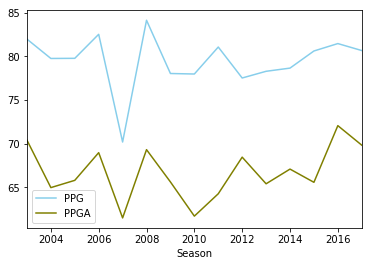

In [15]:
duke.plot(x ='Season', y = ['PPG', 'PPGA'], color = ['skyblue', 'olive'])

In [16]:
duke = duke.sort_values(by =['Season'])

In [17]:
df1

,TeamID,TeamName,Season,Number Wins,Number Losses,PPG,PPGA,DRB,DRB Allowed,ORB,...,Assists,Assists Allowed,Turnovers,Turnovers Forced,Steals,Steals Allowed,Blocks,Blocks Allowed,Personal Fouls,Personal Fouls Received
0,1101,Abilene Chr,2003,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1101,Abilene Chr,2007,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1101,Abilene Chr,2008,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1101,Abilene Chr,2017,9,16,67.880000,72.640000,22.880000,25.040000,7.560000,...,13.600000,13.600000,14.480000,14.800000,7.000000,6.040000,2.760000,3.160000,22.160000,17.240000
4,1101,Abilene Chr,2004,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,1101,Abilene Chr,2006,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,1101,Abilene Chr,2009,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,1101,Abilene Chr,2010,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,1101,Abilene Chr,2011,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,1101,Abilene Chr,2012,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [18]:
def get_team1_win(row):
    if row['WTeamID'] < row['LTeamID']:
        return 1
    else:
        return 0

In [19]:
full_result_season['Team1_win'] = full_result_season[['Season', 'WTeamID', 'LTeamID']].apply(get_team1_win, axis=1)

In [20]:
full_result_season['Team1'] = full_result_season[['WTeamID', 'LTeamID']].min(axis=1)
full_result_season['Team2'] = full_result_season[['WTeamID', 'LTeamID']].max(axis=1)

In [21]:
season_stats = full_result_season[['Season', 'Team1', 'Team2', 'Team1_win']]

In [22]:
season_stats = pd.merge(season_stats, df1, left_on=['Season', 'Team1'], right_on=['Season', 'TeamID'], how='left')
del season_stats['TeamID']

In [23]:
season_stats = pd.merge(season_stats, df1, left_on=['Season', 'Team2'], right_on=['Season', 'TeamID'], how='left', suffixes=['_1', '_2'])
del season_stats['TeamID']

In [24]:
season_stats.columns

Index(['Season', 'Team1', 'Team2', 'Team1_win', 'TeamName_1', 'Number Wins_1',
       'Number Losses_1', 'PPG_1', 'PPGA_1', 'DRB_1', 'DRB Allowed_1', 'ORB_1',
       'ORB Allowed_1', 'FG Percent_1', 'FG Percent Allowed_1',
       '3 Point Percent_1', '3 Point Percent Alllowed_1', 'FT Percent_1',
       'FT Opponent_1', 'Assists_1', 'Assists Allowed_1', 'Turnovers_1',
       'Turnovers Forced_1', 'Steals_1', 'Steals Allowed_1', 'Blocks_1',
       'Blocks Allowed_1', 'Personal Fouls_1', 'Personal Fouls Received_1',
       'TeamName_2', 'Number Wins_2', 'Number Losses_2', 'PPG_2', 'PPGA_2',
       'DRB_2', 'DRB Allowed_2', 'ORB_2', 'ORB Allowed_2', 'FG Percent_2',
       'FG Percent Allowed_2', '3 Point Percent_2',
       '3 Point Percent Alllowed_2', 'FT Percent_2', 'FT Opponent_2',
       'Assists_2', 'Assists Allowed_2', 'Turnovers_2', 'Turnovers Forced_2',
       'Steals_2', 'Steals Allowed_2', 'Blocks_2', 'Blocks Allowed_2',
       'Personal Fouls_2', 'Personal Fouls Received_2'],
  

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import xgboost as xgb

In [162]:
no_reg_cols = ['Team1_win', 'TeamName_1', 'TeamName_2', 'Season', 'Team1', 'Team2', 'Number Losses_1', 'Number Losses_2',\
              'PPGA_1', 'PPGA_2']

regressors = [col for col in train.columns if (col not in no_reg_cols) and ('Allowed' not in col) and ('Forced' not in col) and ('Received' not in col) and ('Opponent' not in col) and (('Alllowed' not in col))]
print('Features to be used in training: ', regressors)
train, val = train_test_split(season_stats, test_size=.2)

X_train = train[regressors].values
y_train = train['Team1_win']

X_val = val[regressors].values
y_val = val['Team1_win']

d_train = xgb.DMatrix(X_train, label=y_train)
d_val = xgb.DMatrix(X_val, label=y_val)

print(X_train.shape)
print(X_val.shape)

Features to be used in training:  ['Number Wins_1', 'PPG_1', 'DRB_1', 'ORB_1', 'FG Percent_1', '3 Point Percent_1', 'FT Percent_1', 'Assists_1', 'Turnovers_1', 'Steals_1', 'Blocks_1', 'Personal Fouls_1', 'Number Wins_2', 'PPG_2', 'DRB_2', 'ORB_2', 'FG Percent_2', '3 Point Percent_2', 'FT Percent_2', 'Assists_2', 'Turnovers_2', 'Steals_2', 'Blocks_2', 'Personal Fouls_2']
(61308, 24)
(15328, 24)


In [163]:
params = {
    'max_depth':8,
    'min_child_weight': 50,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective':'binary:logistic',
    'eval_metric':'logloss'
}

# With more time, a more rigorous grid search for parameters would get better results
model = xgb.train(
    params,
    d_train,
    num_boost_round=999,
    evals=[(d_val, "Val")],
    early_stopping_rounds=10
)

[0]	Val-logloss:0.615485
Will train until Val-logloss hasn't improved in 10 rounds.
[1]	Val-logloss:0.574678
[2]	Val-logloss:0.551351
[3]	Val-logloss:0.537779
[4]	Val-logloss:0.529432
[5]	Val-logloss:0.525352
[6]	Val-logloss:0.52215
[7]	Val-logloss:0.520864
[8]	Val-logloss:0.520476
[9]	Val-logloss:0.519992
[10]	Val-logloss:0.519878
[11]	Val-logloss:0.52013
[12]	Val-logloss:0.520693
[13]	Val-logloss:0.520687
[14]	Val-logloss:0.520891
[15]	Val-logloss:0.521141
[16]	Val-logloss:0.521514
[17]	Val-logloss:0.521733
[18]	Val-logloss:0.52177
[19]	Val-logloss:0.522035
[20]	Val-logloss:0.522307
Stopping. Best iteration:
[10]	Val-logloss:0.519878



In [72]:
y_pred = model.predict(d_val)
val['win_pred_prob'] = y_pred

/Users/michael/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [73]:
model.feature_names = regressors
pd.Series(model.get_fscore()).sort_values(ascending=False)

Number Wins_2        110
Number Wins_1         95
Turnovers_2           87
FT Percent_2          86
Blocks_1              81
Turnovers_1           76
FG Percent_1          74
Blocks_2              74
FT Percent_1          68
FG Percent_2          65
ORB_1                 60
Assists_1             56
Assists_2             55
DRB_1                 54
3 Point Percent_2     51
Personal Fouls_2      51
3 Point Percent_1     50
PPG_1                 49
Personal Fouls_1      47
Steals_1              45
ORB_2                 44
Steals_2              41
DRB_2                 37
PPG_2                 35
dtype: int64

In [47]:
model.feature_names = regressors
pd.Series(model.get_fscore()).sort_values(ascending=False)

Number Wins_2                 77
Number Wins_1                 64
Blocks_1                      59
FT Percent_2                  57
Blocks_2                      56
Turnovers_2                   55
FT Opponent_1                 53
DRB Allowed_1                 45
Assists_2                     45
Team1                         41
FT Opponent_2                 39
Turnovers_1                   38
PPGA_2                        36
Blocks Allowed_2              35
PPGA_1                        34
FG Percent_1                  33
Blocks Allowed_1              33
3 Point Percent_1             33
Assists_1                     32
Personal Fouls_2              31
DRB_1                         31
Assists Allowed_2             30
3 Point Percent Alllowed_2    30
PPG_2                         30
ORB_1                         29
3 Point Percent Alllowed_1    26
Steals_1                      26
Steals Allowed_1              26
PPG_1                         26
Turnovers Forced_1            26
Personal F

In [74]:
val

,Season,Team1,Team2,Team1_win,TeamName_1,Number Wins_1,Number Losses_1,PPG_1,PPGA_1,DRB_1,...,Assists Allowed_2,Turnovers_2,Turnovers Forced_2,Steals_2,Steals Allowed_2,Blocks_2,Blocks Allowed_2,Personal Fouls_2,Personal Fouls Received_2,win_pred_prob
37470,2010,1288,1313,1,Morgan St,27,9,76.750000,70.250000,24.861111,...,13.500000,18.066667,14.966667,8.366667,7.433333,3.200000,3.766667,22.700000,19.000000,0.944234
35964,2010,1189,1325,0,Elon,8,23,65.774194,73.129032,22.903226,...,13.617647,12.705882,15.058824,7.529412,5.705882,2.617647,3.352941,18.852941,19.823529,0.123299
39507,2011,1212,1349,0,Grambling,12,21,60.545455,68.545455,24.909091,...,12.866667,12.433333,13.433333,6.833333,6.000000,2.366667,3.233333,19.166667,20.100000,0.327471
3852,2003,1234,1458,0,Iowa,15,13,69.535714,66.714286,25.035714,...,11.172414,10.517241,13.965517,6.965517,4.655172,2.827586,2.655172,14.827586,18.965517,0.209893
21848,2007,1334,1364,0,Pacific,11,19,68.366667,71.900000,22.066667,...,13.214286,14.035714,13.500000,6.071429,5.750000,2.964286,2.607143,16.642857,19.035714,0.190756
8173,2004,1131,1263,1,Boston Univ,23,5,67.071429,58.785714,23.428571,...,11.571429,14.892857,12.964286,6.464286,6.892857,3.714286,2.714286,17.392857,18.178571,0.730136
50979,2013,1228,1441,1,Illinois,21,12,68.636364,65.424242,21.454545,...,11.548387,12.580645,13.580645,7.322581,7.451613,2.903226,3.516129,19.806452,16.225806,0.902641
64065,2015,1224,1271,1,Howard,13,16,60.586207,62.620690,22.724138,...,12.187500,15.187500,13.968750,7.531250,7.031250,1.437500,3.250000,19.750000,19.531250,0.317204
65229,2015,1150,1349,1,Charlotte,14,18,73.812500,72.406250,24.531250,...,13.620690,14.241379,12.655172,6.068966,6.793103,2.241379,3.482759,18.896552,16.896552,0.671794
48283,2012,1248,1298,1,Lafayette,13,18,69.709677,72.903226,21.645161,...,13.250000,14.535714,13.750000,7.285714,6.071429,1.785714,2.892857,18.357143,16.785714,0.961493


In [164]:
result_df = pd.read_csv('./SampleSubmissionStage1.csv')

In [165]:
def get_season_team_12(row):
    return row['ID'].split('_')

In [166]:
result_df['Season'] = result_df.apply(lambda x : int(get_season_team_12(x)[0]), axis=1)
result_df['Team1'] = result_df.apply(lambda x : int(get_season_team_12(x)[1]), axis=1)
result_df['Team2'] = result_df.apply(lambda x : int(get_season_team_12(x)[2]), axis=1)
del result_df['ID']
del result_df['Pred']

In [167]:
result_df = pd.merge(result_df, df1, left_on=['Season', 'Team1'], right_on=['Season', 'TeamID'])
del result_df['TeamID']

In [168]:
result_df = pd.merge(result_df, df1, left_on=['Season', 'Team2'], right_on=['Season', 'TeamID'], how='left', suffixes=['_1', '_2'])
del result_df['TeamID']

In [172]:
result_df[regressors].columns

Index(['Number Wins_1', 'PPG_1', 'DRB_1', 'ORB_1', 'FG Percent_1',
       '3 Point Percent_1', 'FT Percent_1', 'Assists_1', 'Turnovers_1',
       'Steals_1', 'Blocks_1', 'Personal Fouls_1', 'Number Wins_2', 'PPG_2',
       'DRB_2', 'ORB_2', 'FG Percent_2', '3 Point Percent_2', 'FT Percent_2',
       'Assists_2', 'Turnovers_2', 'Steals_2', 'Blocks_2', 'Personal Fouls_2'],
      dtype='object')

In [174]:
result_df[regressors].columns == train[regressors].columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True], dtype=bool)

In [175]:
X_result = result_df[regressors].values
d_result = xgb.DMatrix(X_result)

In [176]:
result_pred = model.predict(d_result)

In [178]:
result_df['pred'] = result_pred

In [185]:
result_pred_df = result_df

In [187]:
result_df = pd.read_csv('./SampleSubmissionStage1.csv')

In [189]:
result_df['Pred'] = result_pred

In [192]:
result_df.to_csv('Predictions.csv', index=False)